# US009

## Introdução

Como gestor de espaços verdes (GSM), é crucial entender o padrão de consumo de água nos parques para uma gestão eficiente dos recursos e custos associados. Nesta User Story, realizamos uma análise estatística detalhada do consumo de água em diferentes parques, utilizando dados detalhados fornecidos pelo arquivo "water_consumption.csv". 
Ao calcular o custo médio mensal relacionado ao consumo de água para cada parque e comparar estatísticas entre o parque com o maior e menor consumo, procura-se identificar padrões, tendências e possíveis áreas de melhoria na gestão do consumo de água. 
Esta análise não apenas nos ajuda a entender melhor os custos operacionais, mas também capacita um GSM a tomar decisões informadas para promover a sustentabilidade e eficiência nos espaços verdes.

## Código e Resultados

No ficheiro dado, existem 5 parques.


Digite o ano a analisar (2023-2024):  2023
Digite o mês inicial (1-12):  1
Digite o mês final (1-12):  12
Digite a identificação do parque para o gráfico de consumo de água:  Cidade


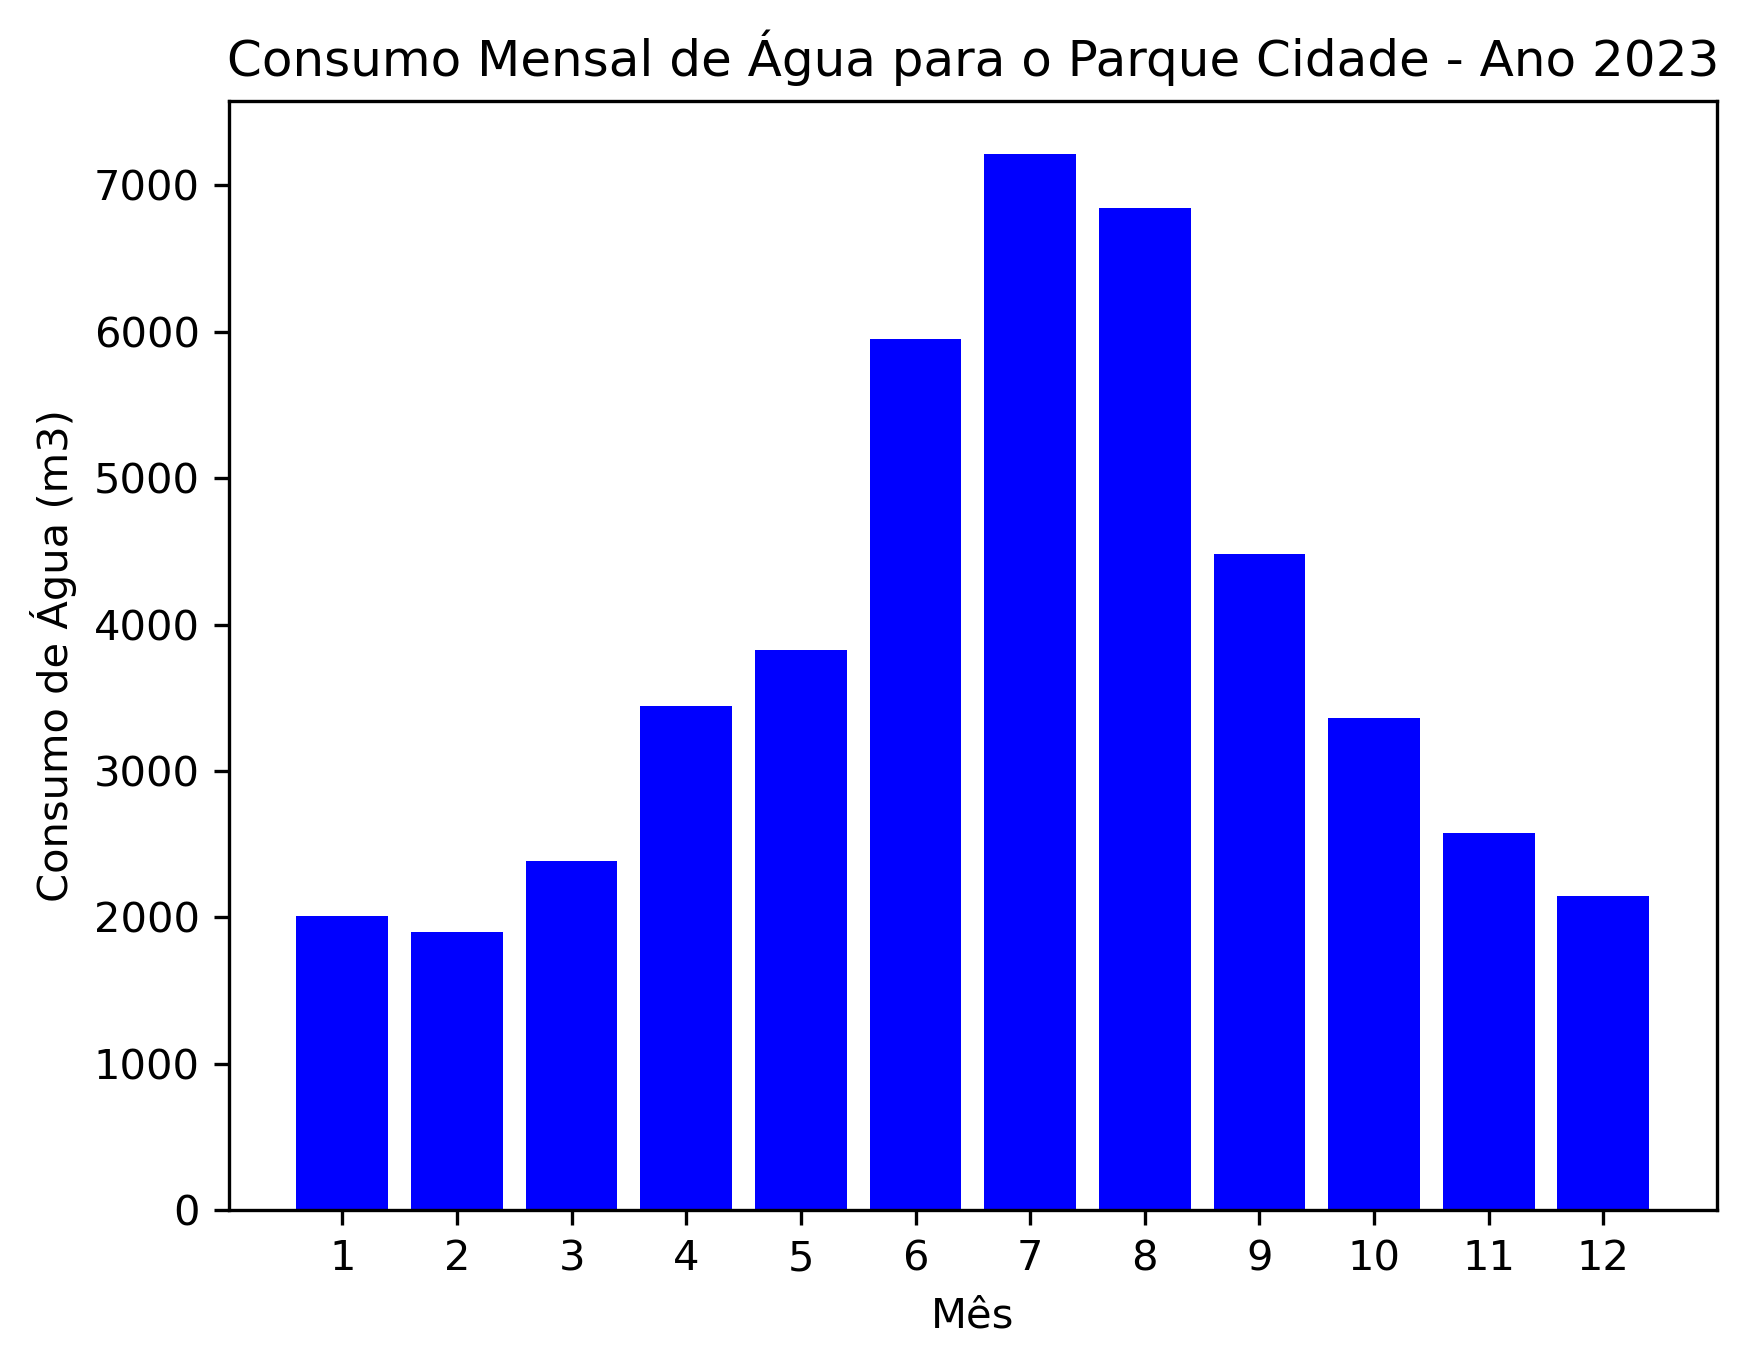


Digite o número de parques a serem analisados:  2
Digite a identificação do parque:  Cidade
Digite a identificação do parque:  ArcaAgua



Custo Médio Mensal para Cidade: 3450.80€

Custo Médio Mensal para ArcaAgua: 239.29€

Tabela de Dados dos Parques:
+----------+---------------+---------+-----------+-----------------+-----------------------------+--------------------------+
| Parque   | Descrição     |   Média |   Mediana |   Desvio Padrão |   Coeficiente de Assimetria | Existência de Outliers   |
+==========+===============+=========+===========+=================+=============================+==========================+
| ArcaAgua | Menor Consumo |    9    |      6.77 |            4.85 |                        2.16 | Sim                      |
+----------+---------------+---------+-----------+-----------------+-----------------------------+--------------------------+
| Cidade   | Maior Consumo |  116.24 |     86    |           71.65 |                        3.99 | Sim                      |
+----------+---------------+---------+-----------+-----------------+-----------------------------+--------------------------+

Ta

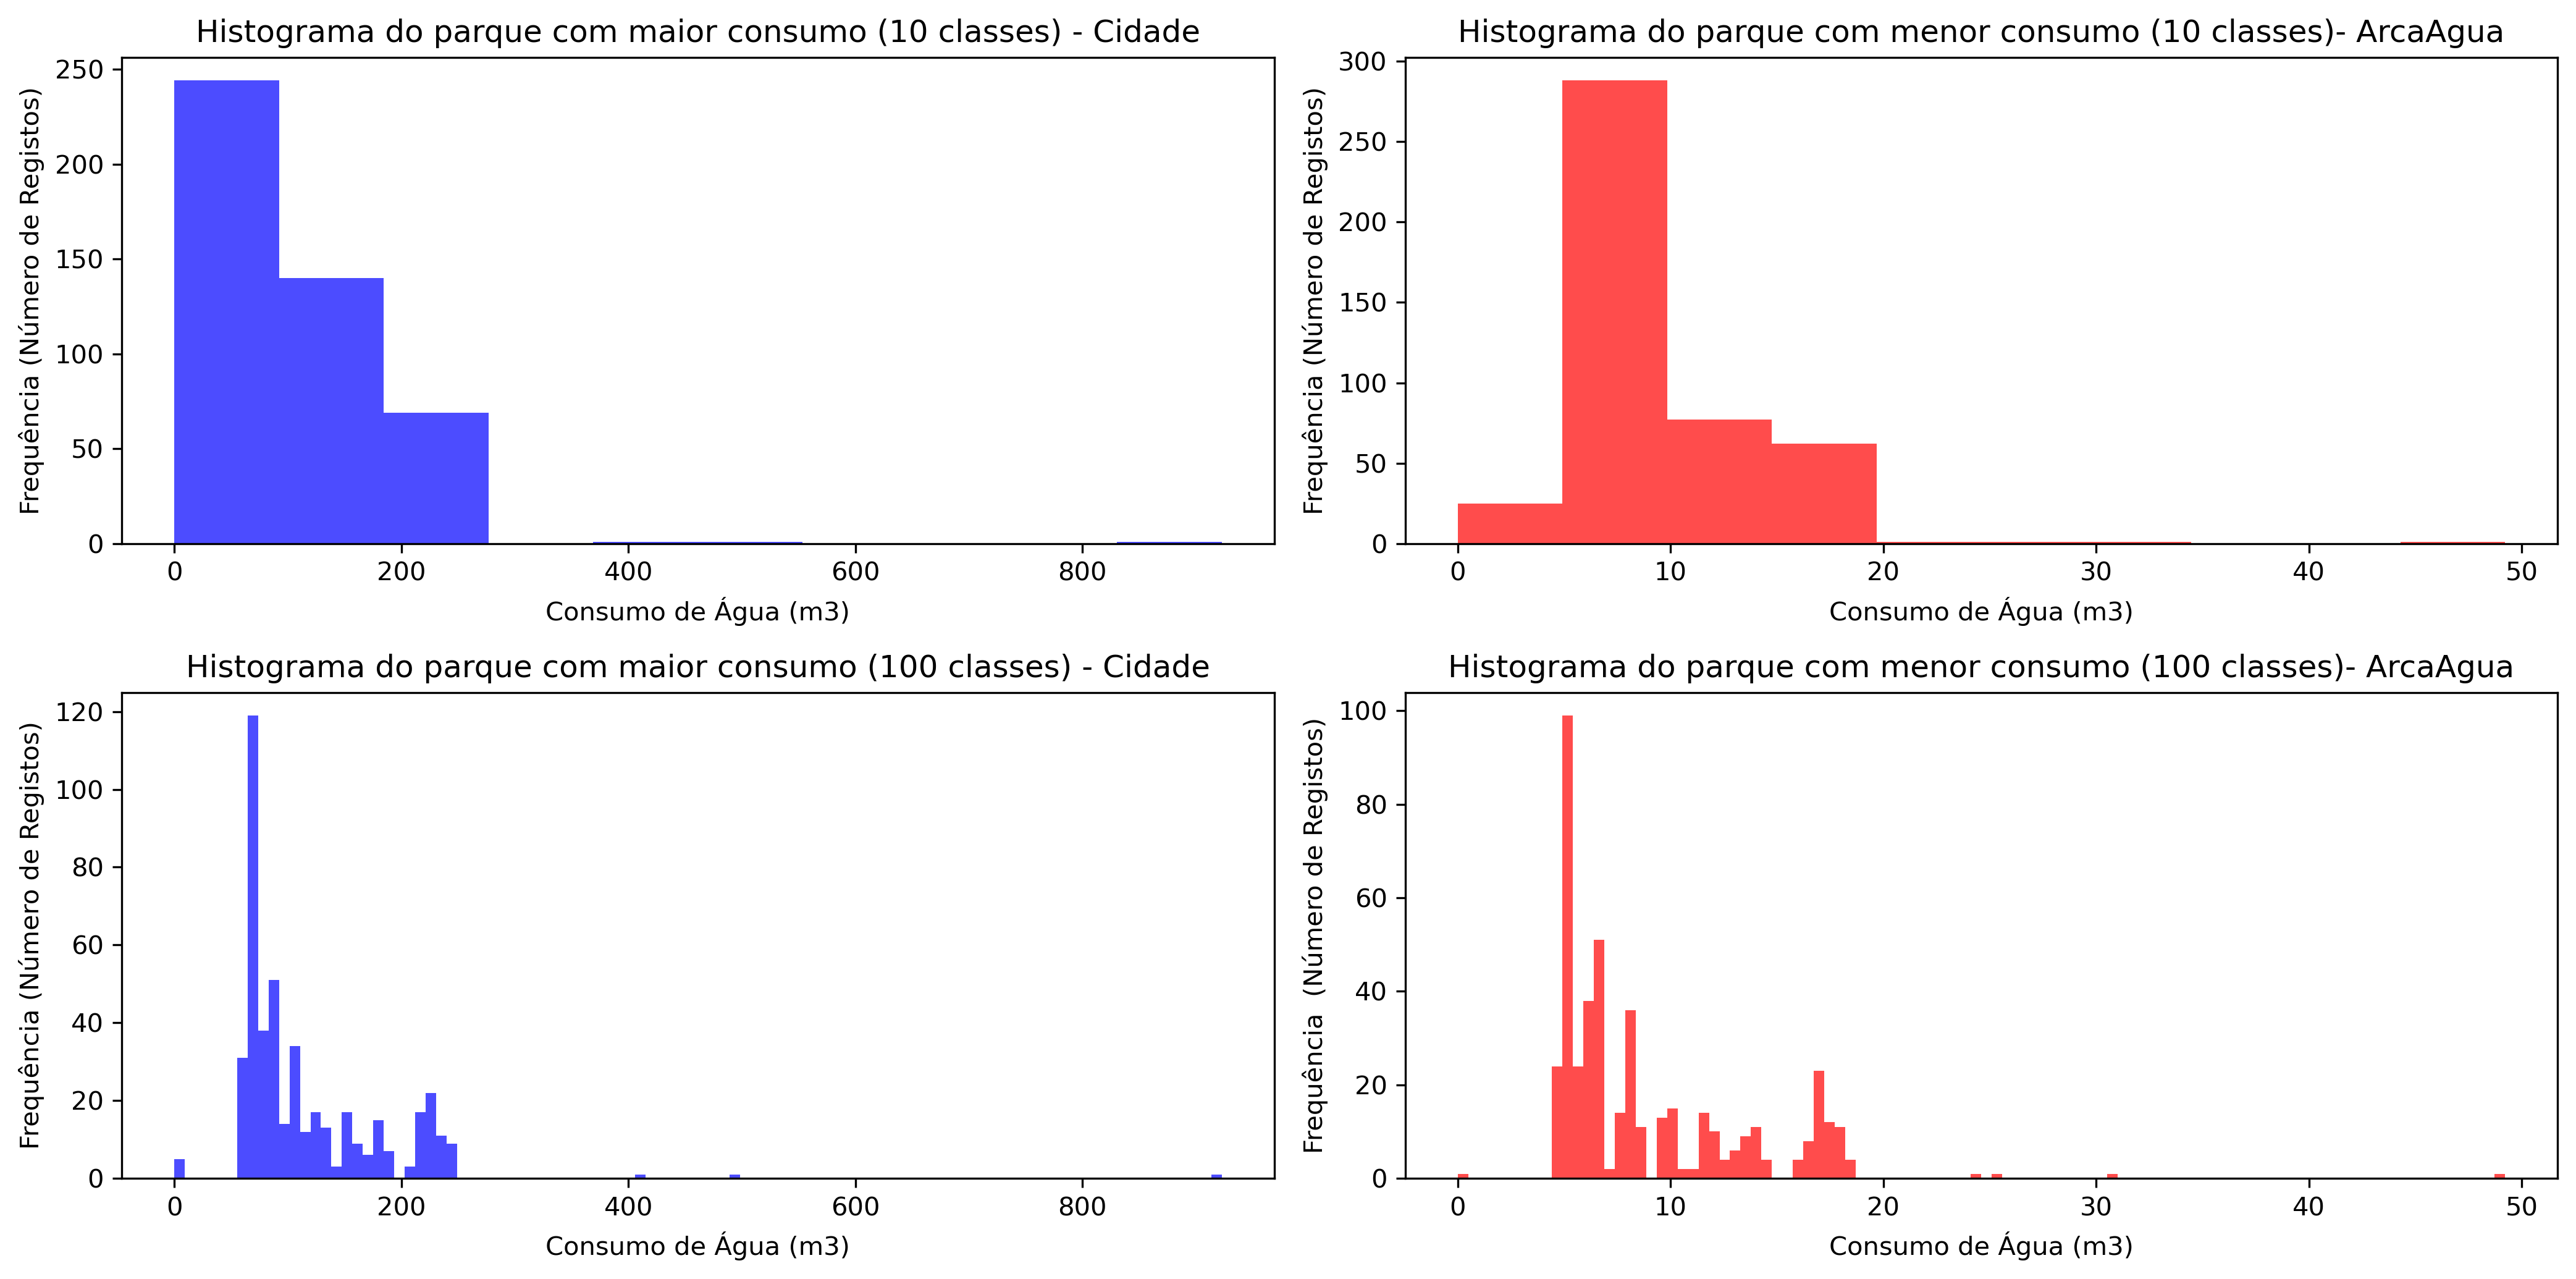

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from tabulate import tabulate

####################################################################
####################################################################
#######################     PARTE 1    ############################
####################################################################
####################################################################

# Função para calcular o custo da água para um determinado consumo
def calcular_custo_agua(consumo):
    taxa = 0.15
    limite_consumo = 1000
    price = 0.7

    if consumo <= limite_consumo:
        return consumo * price
    else:
        custo_ate_limite = limite_consumo * price
        consumo_excedente = consumo - limite_consumo
        custo_excedente = consumo_excedente * (price + (price * taxa))
    return custo_ate_limite + custo_excedente


# Função para imprimir o gráfico de barras representando o consumo mensal de água
def imprimir_consumo_mensal_agua(dados, ano, mes_inicio, mes_fim, identificacao_parque):
    # Filtra os dados com base no ano, período de tempo e identificação do parque
    dados_filtrados = dados[(dados['Year'] == ano) &
                            (dados['Month'] >= mes_inicio) &
                            (dados['Month'] <= mes_fim) &
                            (dados['Park'] == identificacao_parque)]

    consumo_mensal = {}

    # Agrupa os dados pelo mês e calcula a soma do consumo para cada mês
    for mes, grupo in dados_filtrados.groupby('Month'):
        consumo_total_mes = grupo['Consumption'].sum()
        consumo_mensal[mes] = consumo_total_mes

    # Ordena os meses
    meses_ordenados = sorted(consumo_mensal.keys())

    # Cria listas separadas para os meses e os consumos
    meses = [str(mes) for mes in meses_ordenados]
    consumos = [consumo_mensal[mes] for mes in meses_ordenados]

    # Imprime o gráfico de barras
    plt.figure(dpi=300)
    plt.bar(meses, consumos, color='blue')
    plt.xlabel('Mês')
    plt.ylabel('Consumo de Água (m3)')
    plt.title(f'Consumo Mensal de Água para o Parque {identificacao_parque} - Ano {ano}')
    plt.show()


# Define o caminho do arquivo CSV
caminho_arquivo = "water_consumption.csv"

# Lê o arquivo CSV em um DataFrame, substituindo vírgulas por pontos nos valores da coluna 'Consumption'
dados = pd.read_csv(caminho_arquivo, sep=';', decimal=',')

# Verificar quantos parques tem no ficheiro
# Crie um conjunto vazio para armazenar os nomes únicos dos parques
parques_unicos = set()
# Percorra todas as linhas do DataFrame
for nome_park in dados['Park']:
    # Adicione o nome do parque ao conjunto de parques únicos
    parques_unicos.add(nome_park)
# Agora, o tamanho do conjunto parques_unicos representa o número de parques únicos
numero_de_parques = len(parques_unicos)
print("No ficheiro dado, existem", numero_de_parques, "parques.")

# Verificar os anos que existem no ficheiro
# Crie um conjunto vazio para armazenar os anos
anos_unicos = set()
# Percorra todas as linhas do DataFrame
for anos in dados['Year']:
    # Adicione ano ao conjunto
    anos_unicos.add(anos)

# Input das especificações (Período de tempo e nome do Parque)
ano = int(input("Digite o ano a analisar (2023-2024): "))
# Verificação dos anos
while ano not in anos_unicos:
    print("\033[91;1m"+'\nO ano inserido não está no ficheiro dado.\n'+"\033[0m")
    ano = int(input("Digite o ano a analisar (2023-2024): "))

mes_inicio = int(input("Digite o mês inicial (1-12): "))
mes_fim = int(input("Digite o mês final (1-12): "))
# Verificação dos meses
while mes_inicio > mes_fim or mes_inicio <= 0 or mes_fim <= 0 or mes_inicio > 12 or mes_fim > 12:
    print("\033[91;1m"+'\nOs dados relativos aos meses de análise estão inválidos, por favor insira de novo. \n'+"\033[0m")
    mes_inicio = int(input("Digite o mês inicial (1-12): "))
    mes_fim = int(input("Digite o mês final (1-12): "))

identificacao_parque = input("Digite a identificação do parque para o gráfico de consumo de água: ")
while identificacao_parque not in parques_unicos:
    print("\033[91;1m"+'\nO parque fornecido não se encontra na lista de parques do ficheiro csv dado.\n'+"\033[0m")
    identificacao_parque = input("Digite a identificação do parque para o gráfico de consumo de água: ")

imprimir_consumo_mensal_agua(dados, ano, mes_inicio, mes_fim, identificacao_parque)


####################################################################
####################################################################
#######################     PARTE 2     ############################
####################################################################
####################################################################

# Função para calcular os custos médios mensais relacionados ao consumo de água
def calcular_custos_medios_mensais(dados, num_parques, parq_unic):
    custos_medios_parques = {}

    for _ in range(num_parques):
        identificacao_parque = input("Digite a identificação do parque: ")
        while identificacao_parque not in parq_unic:
            print("\033[91;1m"+'\nO parque fornecido não se encontra na lista de parques do ficheiro csv dado.\n'+"\033[0m")
            identificacao_parque = input("Digite a identificação do parque: ")

        # Filtra os dados com base na identificação do parque especificada
        dados_filtrados = dados[dados['Park'] == identificacao_parque]

        # Agrupa os dados filtrados por mês e calcula o consumo total para cada mês
        consumo_mensal = dados_filtrados.groupby('Month')['Consumption'].sum()

        # Calcula o custo total para cada mês
        custos_mensais = consumo_mensal.apply(calcular_custo_agua)

        # Calcula o custo médio para o período total de meses
        custo_medio_mensal = custos_mensais.sum() / len(custos_mensais)

        custos_medios_parques[identificacao_parque] = custo_medio_mensal

    return custos_medios_parques


# Input do número de parques a serem analisados
num_parques = int(input("\nDigite o número de parques a serem analisados: "))
# Verificação número de parques inseridos
while num_parques > numero_de_parques or num_parques < 0:
    num_parques = int(input("\nO valor inserido é inválido.\n\n Digite o número de parques a serem analisados: "))

custos_medios_parques = calcular_custos_medios_mensais(dados, num_parques, parques_unicos)
for parque, custo_medio in custos_medios_parques.items():
    print(f"\nCusto Médio Mensal para {parque}: {custo_medio:.2f}€")


####################################################################
####################################################################
#######################     PARTE 3     ############################
####################################################################
####################################################################

# Função para calcular as estatísticas
def calcular_estatisticas(dados):
    mean = round(np.mean(dados['Consumption']), 2)
    median = round(np.median(dados['Consumption']), 2)
    std_dev = round(np.std(dados['Consumption']), 2)
    skewness = round(stats.skew(dados['Consumption']), 2)

    return mean, median, std_dev, skewness


# Verifica outliers
def verificar_outliers(dados):
    Q1 = dados['Consumption'].quantile(0.25)
    Q3 = dados['Consumption'].quantile(0.75)
    IQR = Q3 - Q1
    median = np.median(dados['Consumption'])
    outliers = dados[(dados['Consumption'] < (median - 1.5 * IQR))
                     | (dados['Consumption'] > (median + 1.5 * IQR))]
    return outliers


# Encontra o parque com o maior e o menor consumo de água diário
parque_maior_consumo = dados.groupby('Park')[
    'Consumption'].sum().idxmax()
parque_menor_consumo = dados.groupby('Park')[
    'Consumption'].sum().idxmin()

# Filtra os dados para o parque com o maior consumo e menor consumo
dados_parque_maior_consumo = dados[dados['Park']
                                   == parque_maior_consumo]
dados_parque_menor_consumo = dados[dados['Park']
                                   == parque_menor_consumo]

# Calcula as estatísticas para o parque com o maior consumo e menor consumo
mean_maior, median_maior, std_dev_maior, skewness_maior = calcular_estatisticas(
    dados_parque_maior_consumo)
mean_menor, median_menor, std_dev_menor, skewness_menor = calcular_estatisticas(
    dados_parque_menor_consumo)

# Verifica outliers para o parque com maior consumo e menor consumo
outliers_maior = verificar_outliers(dados_parque_maior_consumo)
outliers_menor = verificar_outliers(dados_parque_menor_consumo)


# Função para construir tabela de frequência
def construir_tabela_frequencia(dados, num_classes):
    intervalos = pd.cut(dados, bins=num_classes, include_lowest=True, right=False)
    frequencia_absoluta = intervalos.value_counts().sort_index()
    frequencia_relativa = (frequencia_absoluta / len(dados)
                           * 100).round(2).astype(str) + '%'
    consumo = [
        f'[{intervalo.left:.2f}, {intervalo.right:.2f}]' for intervalo in frequencia_absoluta.index]
    tabela_frequencia = pd.DataFrame(
        {'Intervalos de Consumo': consumo, 'Freq. abs.': frequencia_absoluta, 'Freq. rel.': frequencia_relativa})
    return tabela_frequencia


# Função para construir tabela com informações sobre os parques
def construir_tabela_informacoes(parque_menor, dados_parque_menor, parque_maior, dados_parque_maior):
    media_menor, mediana_menor, desvio_padrao_menor, assimetria_menor = calcular_estatisticas(dados_parque_menor)
    media_maior, mediana_maior, desvio_padrao_maior, assimetria_maior = calcular_estatisticas(dados_parque_maior)

    outliers_menor = verificar_outliers(dados_parque_menor)
    outliers_maior = verificar_outliers(dados_parque_maior)

    if outliers_menor.empty:
        outliers_menor = "Não"
    else:
        outliers_menor = "Sim"

    if outliers_maior.empty:
        outliers_maior = "Não"
    else:
        outliers_maior = "Sim"

    tabela_info = pd.DataFrame({
        'Parque': [parque_menor, parque_maior],
        'Descrição': ['Menor Consumo', 'Maior Consumo'],
        'Média': [media_menor, media_maior],
        'Mediana': [mediana_menor, mediana_maior],
        'Desvio Padrão': [desvio_padrao_menor, desvio_padrao_maior],
        'Coeficiente de Assimetria': [assimetria_menor, assimetria_maior],
        'Existência de Outliers': [outliers_menor, outliers_maior]
    })

    return tabela_info


def imprimir_tabela_formatada(tabela):
    print(tabulate(tabela, headers='keys', tablefmt='grid', showindex= False))


# Construir tabela de dados para os parques com maior e menor consumo
tabela_info = construir_tabela_informacoes(parque_menor_consumo, dados_parque_menor_consumo, parque_maior_consumo,
                                           dados_parque_maior_consumo)

# Construir tabelas de frequências para os parques com maior e menor consumo
tabela_frequencia_maior = construir_tabela_frequencia(dados_parque_maior_consumo['Consumption'],
                                                      num_classes=5).reset_index(drop=True)
tabela_frequencia_menor = construir_tabela_frequencia(dados_parque_menor_consumo['Consumption'],
                                                      num_classes=5).reset_index(drop=True)

# Exibir a tabela de informações
print("\nTabela de Dados dos Parques:")
imprimir_tabela_formatada(tabela_info)

# Exibir as tabelas de frequencias
print(
    f"\nTabela de Frequência - Parque com Maior Consumo: {parque_maior_consumo}")
imprimir_tabela_formatada(tabela_frequencia_maior)

print(
    f"\nTabela de Frequência - Parque com Menor Consumo: {parque_menor_consumo}")
imprimir_tabela_formatada(tabela_frequencia_menor)

# Histograma do parque com maior consumo com 10 classes e do parque com menor consumo com 10 classes
plt.figure(figsize=(14, 7),dpi=300)

plt.subplot(2, 2, 1)
plt.hist(dados_parque_maior_consumo['Consumption'], bins=10, color='blue', alpha=0.7)
plt.title(f'Histograma do parque com maior consumo (10 classes) - {parque_maior_consumo}')
plt.xlabel('Consumo de Água (m3)')
plt.ylabel('Frequência (Número de Registos)')

plt.subplot(2, 2, 2)
plt.hist(dados_parque_menor_consumo['Consumption'], bins=10, color='red', alpha=0.7)
plt.title(f'Histograma do parque com menor consumo (10 classes)- {parque_menor_consumo}')
plt.xlabel('Consumo de Água (m3)')

plt.ylabel('Frequência (Número de Registos)')

# Histograma do parque com maior consumo com 100 classes e do parque com menor consumo com 100 classes
plt.subplot(2, 2, 3)
plt.hist(dados_parque_maior_consumo['Consumption'], bins=100, color='blue', alpha=0.7)
plt.title(f'Histograma do parque com maior consumo (100 classes) - {parque_maior_consumo}')
plt.xlabel('Consumo de Água (m3)')
plt.ylabel('Frequência (Número de Registos)')

plt.subplot(2, 2, 4)
plt.hist(dados_parque_menor_consumo['Consumption'], bins=100, color='red', alpha=0.7)
plt.title(f'Histograma do parque com menor consumo (100 classes)- {parque_menor_consumo}')
plt.xlabel('Consumo de Água (m3)')
plt.ylabel('Frequência  (Número de Registos)')

plt.tight_layout()
plt.show()


## Análise e Interpretação dos Resultados

Ao analisar os dados fornecidos sobre o consumo de água nos parques, observamos padrões interessantes que nos fornecem insights valiosos sobre os hábitos de consumo e possíveis áreas de melhoria na gestão dos recursos hídricos.

Padrões Temporais:
Variação do Consumo ao Longo do Ano: Uma observação notável é a variação no consumo de água ao longo do ano. Notamos que o consumo tende a ser menor nos meses de Outono e Inverno. Isso pode ser atribuído ao aumento dos níveis de umidade atmosférica durante essas estações, reduzindo a necessidade de irrigação contínua nos parquss
ário.
Discrepância de Consumo entre os Parques:
Diferenças de Área e Consumo: A discrepância nos valores de consumo de água entre o parque com maior consumo e o parque com menor consumo pode ser parcialmente explicada pelas diferenças de área entre os dois parques. Por exemplo, é razoável supor que o parque "Cidade", com sua área significativamente maior, demandaria naturalmente mais água para irrigação e manutenção em comparação com o parque "ArcaAgua". No entanto, mesmo considerando essas diferenças, a presença de outliers em ambos os parques sugere a possibilidade de ineficiências no uso da água que podem ser abordadas para otimizar a gestão dos recursos híAo compararmos os dados estatísticos de consumo de água nos parques ArcaAgua e Cidade, podemos observar diversas disparidades que fornecem insights importantes sobre os padrões de utilização e possíveis fatores influenciadores.

Média de Consumo de Água:
A média de consumo de água no parque ArcaAgua é significativamente menor, aproximadamente 9m³, em comparação com os 116.24m³ registrados no parque Cidade. Essa disparidade sugere uma diferença substancial nas demandas de irrigação e uso de água entre os dois locais. O parque ArcaAgua, com sua média mais baixa, provavelmente possui uma infraestrutura de rega mais eficiente ou uma área de cobertura vegetal menos extensa, resultando em requisitos de água mais moderados.

Por outro lado, o parque Cidade, com sua média consideravelmente mais alta, indica uma demanda significativamente maior de água. Isso pode ser atribuído à presença de áreas urbanas dentro do parque, como jardins públicos, campos esportivos ou áreas de lazer, que requerem irrigação regular para manutenção da vegetação e condições estéticas.

Mediana de Consumo de Água:
A mediana de consumo de água nos parques ArcaAgua (6.77m³) e Cidade (86m³) revela uma diferença na distribuição dos dados. Enquanto a mediana do parque ArcaAgua sugere uma distribuição relativamente uniforme dos valores de consumo ao longo de um espectro mais amplo, a mediana do parque Cidade indica uma concentração maior de valores mais altos.

Isso pode ser interpretado como uma indicação de que uma proporção significativa dos dados de consumo de água no parque Cidade está concentrada em valores mais elevados, o que pode ser atribuído a áreas específicas dentro do parque que exigem irrigação intensiva, como campos esportivos de grama ou jardins ornamentais.

Desvio Padrão do Consumo de Água:
O desvio padrão, que mede a dispersão dos dados em torno da média, é outro indicador importante a considerar. No parque ArcaAgua, o desvio padrão é relativamente baixo (aproximadamente 4.85m³), sugerindo uma consistência nos padrões de consumo ao longo do tempo. Isso pode indicar uma estabilidade nas condições ambientais ou uma gestão eficaz dos recursos hídricos.

No entanto, no parque Cidade, o desvio padrão é significativamente mais alto (aproximadamente 71.65m³), indicando uma variabilidade mais ampla nos valores de consumo de água. Isso pode ser atribuído a uma combinação de fatores, incluindo a presença de áreas com diferentes necessidades de irrigação, condições climáticas variáveis e até mesmo questões de gestão de água.

Coeficiente de Assimetria do Consumo de Água:
O coeficiente de assimetria, que mede a forma da distribuição dos dados, também fornece informações valiosas. Tanto no parque ArcaAgua (coeficiente de assimetria positivo de aproximadamente 2.16) quanto no parque Cidade (coeficiente de assimetria positivo de aproximadamente 3.99), observamos uma assimetria à direita na distribuição dos dados.

Isso sugere uma prevalência de valores de consumo de água mais altos, indicando que uma proporção significativa dos dados está concentrada nos valores mais elevados. No parque Cidade, essa assimetria é ainda mais pronunciada, o que pode refletir a presença de áreas com demandas muito elevadas de água ou até mesmo a ocorrência de eventos de consumo extremo em de

Presença de Outliers:
Identificação de Valores Atípicos: Tanto na análise dos histogramas quanto na inspeção das tabelas de dados e de frequências, identificamos a presença de outliers, ou valores atípicos, em ambos os parques - tanto no parque com menor consumo de água quanto no parque com maior consumo. Esta observação sugere a possibilidade de um problema no sistema de rega, resultando em picos irregulares de consumo de água. Esses outliers merecem uma investigação mais detalhada para identificar suas causas subjacentes e tomar medidas corretivas, se necessário.terminados períodos.

Conclusão:
Essa análise mais profunda dos dados estatísticos de consumo de água nos parques ArcaAgua e Cidade revela uma série de diferenças significativas nos padrões de utilização. Enquanto o parque ArcaAgua apresenta uma demanda mais moderada e padrões de consumo mais estáveis, o parque Cidade mostra uma variabilidade maior nos valores de consumo e uma concentração de demanda em áreas específicas.

Essas disparidades são cruciais para orientar estratégias de gestão de recursos hídricos e conservação, destacando a importância de abordagens diferenciadas para atender às necessidades específicas de cada parque. Essa análise também destaca a necessidade de monitoramento contínuo e adaptação das práticas de gestão de água para garantir a eficiência e sustentabilidade do uso de recursos hídricos em ambientes urbanos e naturais.

# US010

## Introdução US010

Os equipamentos disponíveis em nossos parques desempenham um papel fundamental na experiência do usuário e na atratividade dos espaços verdes. Para compreender melhor a preferência dos usuários e otimizar a manutenção dos equipamentos, realizamos uma análise detalhada do uso de equipamentos, utilizando dados coletados no arquivo "EquipmentUsed.csv". 
Ao calcular o número de vezes que cada equipamento foi usado e representar esses dados em um gráfico de pizza, buscamos identificar quais equipamentos são mais populares e exigem maior atenção. 
Essa análise nos permite direcionar nossos recursos de manutenção de forma mais eficaz, garantindo uma experiência positiva para os usuários e prolongando a vida útil dos equipamentos em nossos parques.

## Código e Resultados US010

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Importar os dados do arquivo
caminho_arquivo = "EquipmentUsed.csv"
dados = pd.read_csv(caminho_arquivo, skiprows=1, header=None, names=["Equipment"]) #ignora a primeira linha do ficheiro

# Calcular o número de vezes que cada equipamento foi usado
contagem_equipamentos = dados["Equipment"].value_counts()

# Calcular a percentagem de uso de cada equipamento
percentagens = (contagem_equipamentos / len(dados))*100

# Criar o gráfico de pizza
plt.figure(dpi=300)
plt.pie(percentagens, labels=percentagens.index, autopct='%1.1f%%', startangle=160)
plt.title('Gráfico percentual do uso de equipamento no parque', pad=25, size=15)
plt.axis('equal')  # Faz com que o gráfico seja circular
plt.tight_layout()  # Adiciona espaçamento
plt.show()


## Análise e Interpretação dos Resultados US010

# US011

## Introdução US011

Compreender o perfil demográfico dos usuários de nossos parques é essencial para oferecer experiências personalizadas e serviços sob medida para diferentes grupos de idade. 
Nesta User Story, realizamos uma análise abrangente do perfil dos usuários, utilizando dados coletados no arquivo "Inquiry.csv". 
Ao calcular a proporção de usuários em diferentes faixas etárias que recomendariam o parque a outros e visualizar a frequência mensal de uso do parque por grupo de idade, buscamos identificar padrões de comportamento e preferências dos usuários. 
Esta análise permite adaptar serviços e instalações para atender às necessidades específicas de cada grupo demográfico, promovendo uma experiência inclusiva e enriquecedora para todos os usuários de nossos espaços verdes

## Código e Resultados US011

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate

# Importar o arquivo CSV
df = pd.read_csv('Inquiry.csv', delimiter=';')

# Adicionar uma coluna 'Age' com base no valor de 'Escalao'
df['Age'] = df['Escalao'].apply(lambda x: 'Criança' if x == 1 else ('Adulto' if x == 2 else 'Sênior'))

# Definir o tipo de variável para cada coluna
variable_types = {
    ' - Escalão': 'Variável Quanlitativa Ordinal',
    ' - Y/N': 'Variável Qualitativa Nominal',
    ' - Visits': 'Variável Quantitativa Discreta'
}
print("Tipo de variável para cada uma das três questões:")
for column, variable_type in variable_types.items():
    print(f"{column}: {variable_type}")

# Calcular o número total de Inqueridos em cada faixa etária
total_users_by_age = df.groupby('Age')['Y/N'].count()

# Calcular o número de Inqueridos em cada faixa etária que responderam "Sim"
users_recommending_by_age = df[df['Y/N'] == 'Y'].groupby('Age')['Y/N'].count()

# Calcular a proporção de Inqueridos em cada faixa etária que responderam "Sim"
proportion_recommendations_by_age = round(users_recommending_by_age / total_users_by_age,2)

# Imprimir as proporções em uma tabela formatada
print("\nProporção de utilizadores em cada grupo etário que recomendam o parque:")
table_data = []
for age, proportion in proportion_recommendations_by_age.items():
    table_data.append([age, proportion])
print(tabulate(table_data, headers=['Idade', 'Proporção'], tablefmt='grid'))

# plt.figure(dpi=300)

# Criar boxplot para a frequência mensal de uso do parque por grupo de idade, incluindo outliers
df.boxplot(column='Visits', by='Age', grid=True, showfliers=True)  # showfliers=True indica outliers
plt.xlabel("Idade")  # Legenda do eixo x
plt.ylabel("Visitas")  # Legenda do eixo y
plt.title("Frequência mensal de uso do parque por grupo de idade", pad=25, size=15)  # Título
plt.suptitle("") #Retira subtítulo
plt.tight_layout()  # Adiciona espaço

# Conclusões do boxplot
conclusions = """
Conclusões:
- Os Idosos tendem a ter uma mediana mais alta na frequência de uso do parque, sugerindo que visitam o parque com mais 
  frequência relativamente aos adultos e crianças.
- As crianças têm uma pequena variabilidade na frequência de uso, como indicado pela variância dos dados e pela amplitude 
  interquartil reduzida.
- Os idosos têm uma distribuição mais variada na frequência de uso e maior variação no intervalo interquartis, indicando
  uma inconsistência na frequência de visitas.
- Em geral, parece haver uma tendência de aumento na frequência de uso do parque com a idade, com idosos a visitar o 
  parque com mais frequência em média, seguidos pelos adultos e depois pelas crianças.
- A discrepância de dados entre os idosos e os restantes utilizadores pode ser explicada pelo  facto de existir um maior
  registo de dados dos idosos, isto pode ser esperado uma vez que estes possuem uma frequencia de visita maior
  comparativmente ás crianças e aos adultos.
"""
print(conclusions)

plt.show()


## Análise e Interpretação dos Resultados US011

## Contribuição dos Menbros do grupo

Bruno Teixeira (1230741):
Ricardo Meireles ():
Francisco Pinho ():
Joana Gama ():